In [44]:
import pandas as pd
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import asyn_lpa_communities

# Load the entire Excel file
# xls = pd.ExcelFile('county-to-county-2016-2020-ins-outs-nets-gross.xlsx')

# If you want to load a specific sheet based on its name
# df_state1 = pd.read_excel(xls, 'Alabama')  # replace 'State1TabName' with the actual sheet name

# If you want to load all sheets into a dictionary of DataFrames
# all_sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}


In [25]:
# df_state1 = df_state1.tail(-1)
# df_state1.head()
# df_state1.columns = ['State A', 'County A', 'State B', 'Couunty B', 'Name State A', 'Name Conuty B', 'Name State B', 'Name County B', 'Flow B to A EST', 'Flow B to A MOE', 'Flow A to B EST', 'Flow A to B MOE', 'Net B to A EST', 'Net B to A MOE', 'Gross A to B EST', 'Gross A to B MOE']


,State A,County A,State B,Couunty B,Name State A,Name Conuty B,Name State B,Name County B,Flow B to A EST,Flow B to A MOE,Flow A to B EST,Flow A to B MOE,Net B to A EST,Net B to A MOE,Gross A to B EST,Gross A to B MOE
2,001,001,001,003,Alabama,Autauga County,Alabama,Baldwin County,30,37,489,395,-459,396,519,398
3,001,001,001,005,Alabama,Autauga County,Alabama,Barbour County,5,8,0,NaN,5,8,5,8
4,001,001,001,007,Alabama,Autauga County,Alabama,Bibb County,12,18,48,61,-36,62,60,65
5,001,001,001,015,Alabama,Autauga County,Alabama,Calhoun County,2,4,23,32,-21,34,25,31
6,001,001,001,017,Alabama,Autauga County,Alabama,Chambers County,0,NaN,7,16,-7,16,7,16


In [26]:
# xls.sheet_names
# df_state1.columns

Index(['State A', 'County A', 'State B', 'Couunty B', 'Name State A',
       'Name Conuty B', 'Name State B', 'Name County B', 'Flow B to A EST',
       'Flow B to A MOE', 'Flow A to B EST', 'Flow A to B MOE',
       'Net B to A EST', 'Net B to A MOE', 'Gross A to B EST',
       'Gross A to B MOE'],
      dtype='object')

In [29]:
G = nx.from_pandas_edgelist(df_state1, 'Couunty B', 'County A', ['Flow B to A EST'])

In [33]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print('num_nodes', num_nodes)
print('num_nodes', num_edges)

num_nodes 221
num_nodes 2864


In [35]:
degrees = dict(G.degree())
print(degrees)

{'003': 111, '001': 84, '005': 68, '007': 52, '015': 95, '017': 56, '019': 60, '021': 52, '025': 49, '029': 49, '031': 85, '033': 70, '035': 42, '045': 90, '047': 63, '049': 68, '051': 82, '055': 84, '063': 48, '067': 49, '069': 112, '073': 140, '077': 81, '081': 119, '083': 86, '085': 37, '087': 57, '089': 128, '091': 52, '093': 55, '095': 84, '097': 134, '101': 127, '103': 100, '105': 46, '107': 58, '109': 72, '113': 88, '115': 69, '117': 110, '121': 83, '123': 55, '125': 122, '127': 75, '129': 41, '131': 43, '009': 64, '057': 56, '135': 22, '153': 22, '235': 3, '245': 16, '285': 16, '111': 49, '163': 22, '011': 43, '159': 12, '189': 18, '119': 49, '147': 18, '183': 17, '191': 5, '023': 44, '137': 10, '059': 55, '149': 22, '187': 14, '027': 41, '041': 41, '201': 24, '329': 3, '441': 8, '453': 12, '495': 1, '013': 49, '161': 17, '710': 9, '810': 11, '053': 53, '141': 25, nan: 64, '039': 65, '043': 76, '071': 70, '079': 49, '099': 45, '133': 53, '170': 4, '240': 2, '037': 55, '075': 40

In [39]:
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
print('betweenness', betweenness)
print('closeness', closeness)

betweenness {'003': 0.05078804903070635, '001': 0.021264372712559307, '005': 0.033366488600835985, '007': 0.0011801133997024773, '015': 0.02543574932506028, '017': 0.0023576690029610773, '019': 0.004115214768518651, '021': 0.004530558327947596, '025': 0.0006771251752531982, '029': 0.011100529160939688, '031': 0.02517660979890342, '033': 0.006844119739096351, '035': 0.00022474972099963424, '045': 0.023337808854466666, '047': 0.006244309276251461, '049': 0.008308307370216384, '051': 0.01647664685430658, '055': 0.018611862088287627, '063': 0.0006463768588509184, '067': 0.000670291407129398, '069': 0.060637089214734784, '073': 0.10590940967224965, '077': 0.011932777071127217, '081': 0.07586647185711344, '083': 0.012657776080088258, '085': 9.322817476497343e-05, '087': 0.0027714713442962757, '089': 0.0824406931908693, '091': 0.0004647838587442078, '093': 0.0040622377661209364, '095': 0.00867164683648944, '097': 0.12204669392211027, '101': 0.07692119887249695, '103': 0.05028008782733095, '10

In [40]:
communities = community.greedy_modularity_communities(G)

TypeError: Consider using a tuple, with a priority value that can be compared.

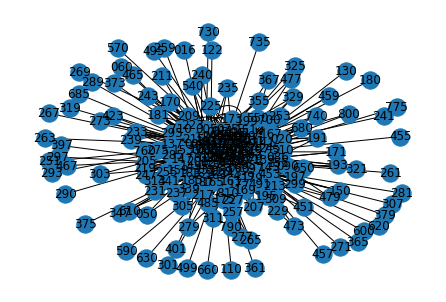

In [42]:
nx.draw(G, with_labels=True)
plt.show()

In [45]:
communities1 = label_propagation_communities(G)
communities2 = list(asyn_lpa_communities(G))

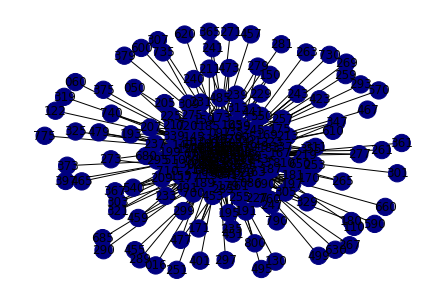

In [48]:
# Create a color map for communities
community_colors = np.array([plt.cm.jet(i) for i in np.linspace(0, 1, len(communities1))])

# Create a mapping of node to community
node_community_map = {node: i for i, community in enumerate(communities1) for node in community}

# Create a node color list
node_colors = [community_colors[node_community_map[node]] for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


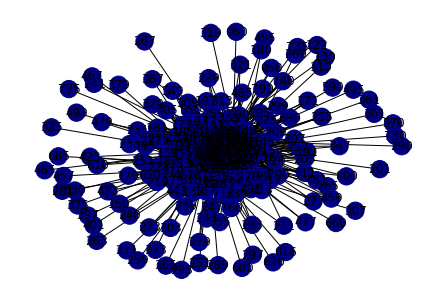

In [49]:
# Create a color map for communities
community_colors = np.array([plt.cm.jet(i) for i in np.linspace(0, 1, len(communities2))])

# Create a mapping of node to community
node_community_map = {node: i for i, community in enumerate(communities2) for node in community}

# Create a node color list
node_colors = [community_colors[node_community_map[node]] for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


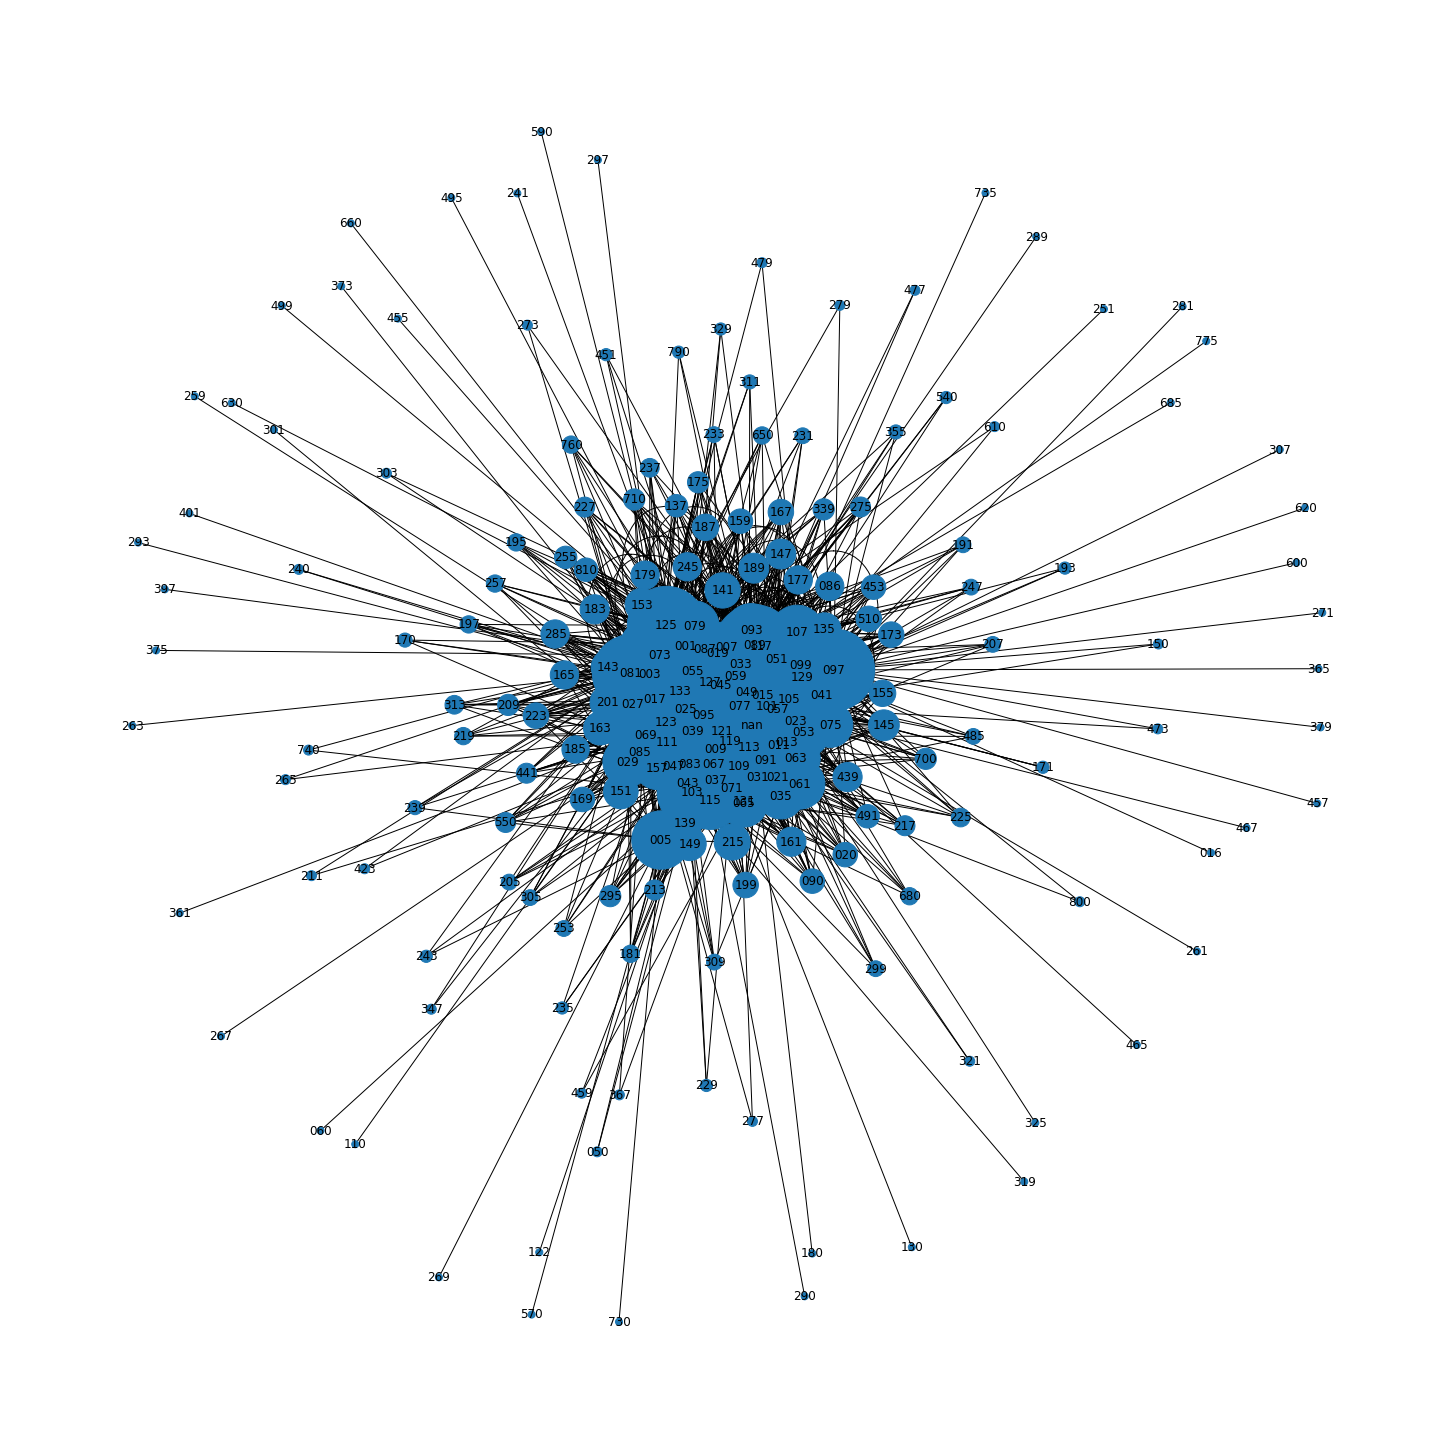

In [58]:
node_sizes = [degrees[node] * 50 for node in G.nodes()]  # Multiply by a factor to adjust the node sizes visually

plt.figure(figsize=(20, 20)) 
nx.draw(G, with_labels=True, node_size=node_sizes)
plt.show()


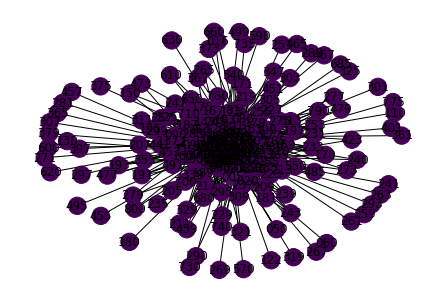

In [56]:
# Assuming you've calculated betweenness centrality
betweenness_values = list(betweenness.values())
node_colors = [plt.cm.viridis(b) for b in betweenness_values]

nx.draw(G, with_labels=True, node_color=node_colors)
plt.plot(figsize=(10,10))

plt.show()


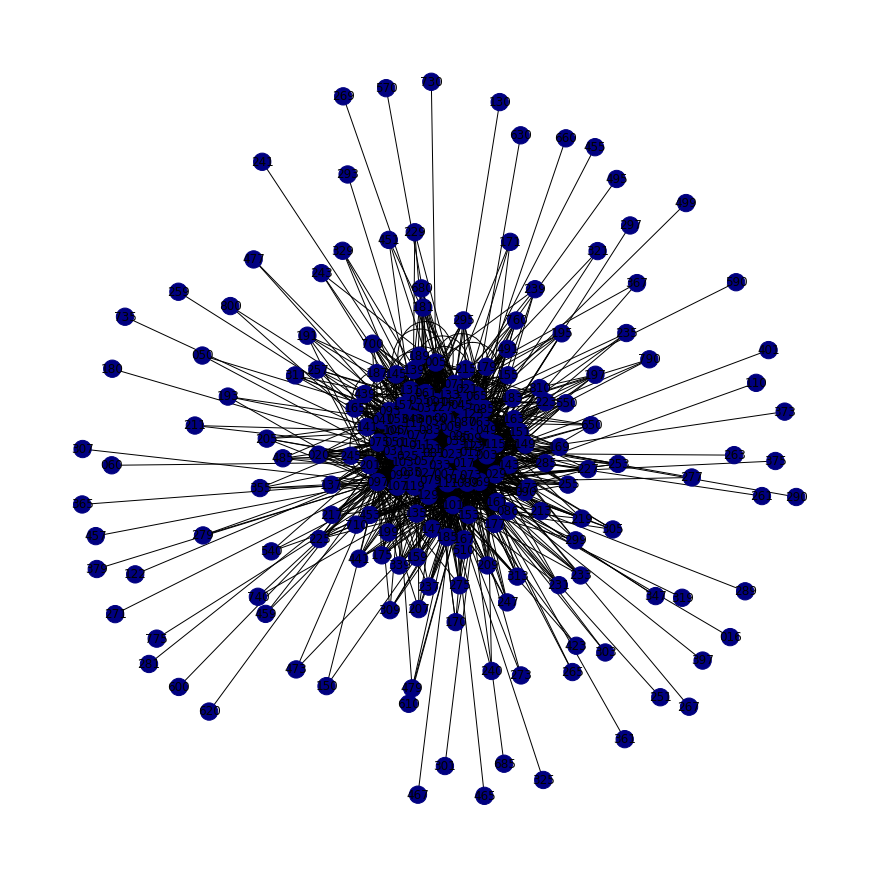

In [60]:
# Create a color map for communities
community_colors = np.array([plt.cm.jet(i) for i in np.linspace(0, 1, len(communities1))])

node_community_map = {node: i for i, community in enumerate(communities1) for node in community}

node_colors = [community_colors[node_community_map[node]] for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


In [82]:
# all_dataframes = []

# all_dataframes = [pd.read_excel(xls, sheet_name=sheet, skiprows=2) for sheet in xls.sheet_names]

# Concatenate all dataframes in the list into a single dataframe
# final_dataframe = pd.concat(all_dataframes, ignore_index=True)

# final_dataframe.head()

# final_dataframe.columns = ['State A', 'County A', 'State B', 'Couunty B', 'Name State A', 'Name Conuty B', 'Name State B', 'Name County B', 'Flow B to A EST', 'Flow B to A MOE', 'Flow A to B EST', 'Flow A to B MOE', 'Net B to A EST', 'Net B to A MOE', 'Gross A to B EST', 'Gross A to B MOE']
final_dataframe.size

6664240

In [74]:
G = nx.from_pandas_edgelist(final_dataframe, 'Couunty B', 'County A', ['Flow B to A EST'])

In [75]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print('num_nodes', num_nodes)
print('num_nodes', num_edges)

num_nodes 10805
num_nodes 30361


In [76]:
degrees = dict(G.degree())
print(degrees)

{3.0: 439, 1.0: 467, 5.0: 468, 7.0: 363, 15.0: 392, 17.0: 385, 19.0: 420, 21.0: 404, 25.0: 376, 29.0: 415, 31.0: 423, 33.0: 356, 35.0: 386, 45.0: 342, 47.0: 317, 49.0: 354, 51.0: 366, 55.0: 335, 63.0: 345, 67.0: 340, 69.0: 333, 73.0: 355, 77.0: 335, 81.0: 314, 83.0: 287, 85.0: 341, 87.0: 291, 89.0: 358, 91.0: 329, 93.0: 312, 95.0: 316, 97.0: 335, 101.0: 310, 103.0: 303, 105.0: 279, 107.0: 298, 109.0: 311, 113.0: 380, 115.0: 298, 117.0: 282, 121.0: 333, 123.0: 265, 125.0: 274, 127.0: 283, 129.0: 224, 131.0: 229, 9.0: 379, 57.0: 343, 135.0: 292, 153.0: 260, 235.0: 92, 245.0: 229, 285.0: 138, 111.0: 309, 163.0: 284, 11.0: 368, 159.0: 198, 189.0: 213, 119.0: 307, 147.0: 252, 183.0: 248, 191.0: 182, 23.0: 304, 137.0: 213, 59.0: 360, 149.0: 215, 187.0: 220, 27.0: 408, 41.0: 375, 201.0: 273, 329.0: 167, 441.0: 175, 453.0: 232, 495.0: 32, 13.0: 434, 161.0: 248, 710.0: 164, 810.0: 159, 53.0: 337, 141.0: 289, nan: 1, nan: 1, nan: 1, 39.0: 347, 43.0: 315, 71.0: 336, 79.0: 318, 99.0: 336, 133.0: 2

In [77]:
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

KeyboardInterrupt: 

In [78]:
communities1 = label_propagation_communities(G)
communities2 = list(asyn_lpa_communities(G))

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

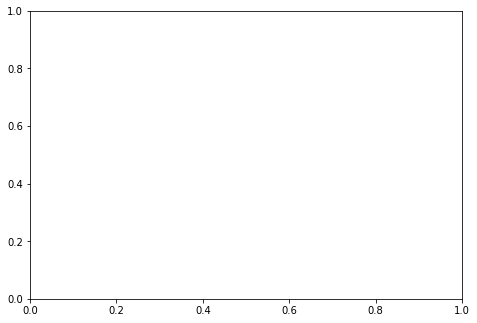

In [80]:
# Create a color map for communities
community_colors = np.array([plt.cm.jet(i) for i in np.linspace(0, 1, len(communities2))])

# Create a mapping of node to community
node_community_map = {node: i for i, community in enumerate(communities2) for node in community}

# Create a node color list
node_colors = [community_colors[node_community_map[node]] for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


In [81]:
# For GraphML
nx.write_graphml(G, "output_graph.graphml")

# For GEXF (often preferable since it retains more data types)
nx.write_gexf(G, "output_graph.gexf")


In [90]:
# final_dataframe.head()

final_dataframe['State-County-A'] = final_dataframe['State A'] + '-' + final_dataframe['County A']

# final_dataframe['County A'] = final_dataframe['County A'].astype(str)

In [92]:
# final_dataframe.head()
final_dataframe['State-County-A'].nunique()

3227